In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
df= pd.read_excel('C:/Users/user/Desktop/DSBA project/godigt_cc_data.xlsx')

In [6]:
df.head()

userid              card_no  card_bin_no Issuer   card_type  \
0       1  4384 39XX XXXX XXXX       438439   Visa        edge   
1       2  4377 48XX XXXX XXXX       437748   Visa  prosperity   
2       3  4377 48XX XXXX XXXX       437748   Visa     rewards   
3       4  4258 06XX XXXX XXXX       425806   Visa   indianoil   
4       5  4377 48XX XXXX XXXX       437748   Visa        edge   

  card_source_date high_networth  active_30  active_60  active_90  ...  \
0       2019-09-29             B          0          1          1  ...   
1       2002-10-30             A          1          1          1  ...   
2       2013-10-05             C          0          0          0  ...   
3       1999-06-01             E          0          1          1  ...   
4       2006-06-13             B          1          1          1  ...   

   bank_vintage  T+1_month_activity  T+2_month_activity T+3_month_activity  \
0            27                   0                   0                  0   
1            52                   0                   0                  0   
2            23                   1                   0                  0   
3            49                   0                   0                  1   
4            21                   1                   0                  0   

   T+6_month_activity  T+12_month_activity  Transactor_revolver  \
0                   0                    0                    T   
1                   0                    0                    R   
2                   0                    0                    R   
3                   0                    0                    T   
4                   0                    0                    T   

  avg_spends_l3m  Occupation_at_source  cc_limit  
0          27729         Self Employed    290000  
1         280854                     0    950000  
2          70587               Student    210000  
3           9156         Self Employed     80000  
4          38108              Salaried    220000  

[5 rows x 28 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [8]:
df.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

what is the avg spend of High networth individuals vs non hni?

what is proportion of issuer for hni

how many card type have acive users in 6 month

what is the occupation at source and cc limit


In [9]:
df.describe()

userid    card_bin_no               card_source_date    active_30  \
count  8448.00000    8448.000000                           8448  8448.000000   
mean   4224.50000  436747.044508  2009-06-19 13:35:17.045454592     0.292377   
min       1.00000  376916.000000            1998-07-24 00:00:00     0.000000   
25%    2112.75000  426241.000000            2004-01-07 18:00:00     0.000000   
50%    4224.50000  437551.000000            2009-05-24 12:00:00     0.000000   
75%    6336.25000  438439.000000            2014-11-27 06:00:00     1.000000   
max    8448.00000  524178.000000            2020-06-17 00:00:00     1.000000   
std    2438.87187   30489.752417                            NaN     0.454881   

         active_60    active_90  cc_active30  cc_active60  cc_active90  \
count  8448.000000  8448.000000  8448.000000  8448.000000  8448.000000   
mean      0.494792     0.642045     0.284091     0.484493     0.632339   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     1.000000     0.000000     0.000000     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   
std       0.500002     0.479427     0.451007     0.499789     0.482197   

       widget_products  engagement_products  annual_income_at_source  \
count      8448.000000          8448.000000             8.448000e+03   
mean          3.614583             3.991122             1.674595e+06   
min           0.000000             0.000000             2.000950e+05   
25%           2.000000             2.000000             1.061104e+06   
50%           4.000000             4.000000             1.372134e+06   
75%           6.000000             6.000000             1.881734e+06   
max           7.000000             8.000000             4.999508e+06   
std           2.273193             2.572135             1.064307e+06   

       bank_vintage  T+1_month_activity  T+2_month_activity  \
count   8448.000000         8448.000000         8448.000000   
mean      33.164181            0.111269            0.047940   
min        6.000000            0.000000            0.000000   
25%       19.000000            0.000000            0.000000   
50%       33.000000            0.000000            0.000000   
75%       47.000000            0.000000            0.000000   
max       60.000000            1.000000            1.000000   
std       15.868344            0.314483            0.213653   

       T+3_month_activity  T+6_month_activity  T+12_month_activity  \
count         8448.000000         8448.000000          8448.000000   
mean             0.080374            0.008878             0.009470   
min              0.000000            0.000000             0.000000   
25%              0.000000            0.000000             0.000000   
50%              0.000000            0.000000             0.000000   
75%              0.000000            0.000000             0.000000   
max              1.000000            1.000000             1.000000   
std              0.271888            0.093809             0.096856   

       avg_spends_l3m       cc_limit  
count     8448.000000    8448.000000  
mean     49527.365530  251706.912879  
min          0.000000       0.000000  
25%      17110.000000   90000.000000  
50%      37943.000000  150000.000000  
75%      66095.750000  350000.000000  
max     289292.000000  990000.000000  
std      46244.954836  229114.856385

<Axes: xlabel='Transactor_revolver', ylabel='count'>

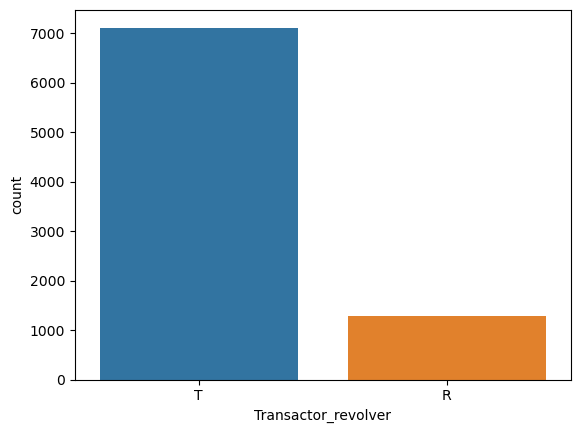

In [10]:
sns.countplot(data=df, x='Transactor_revolver')

In [11]:
df["Transactor_revolver"].value_counts(normalize=True)

Transactor_revolver
T    0.846017
R    0.153983
Name: proportion, dtype: float64

In [12]:
df['card_type'].unique()

array(['edge', 'prosperity', 'rewards', 'indianoil', 'cashback',
       'shoprite', 'chartered', 'aura', 'gold', 'smartearn', 'prime',
       'pulse', 'platinum', 'centurion', 'elite'], dtype=object)

In [13]:
df['Issuer'].unique()

array(['Visa', 'Mastercard', 'Amex'], dtype=object)

In [14]:
df['high_networth'].unique()

array(['B', 'A', 'C', 'E', 'D'], dtype=object)

univariate analysis


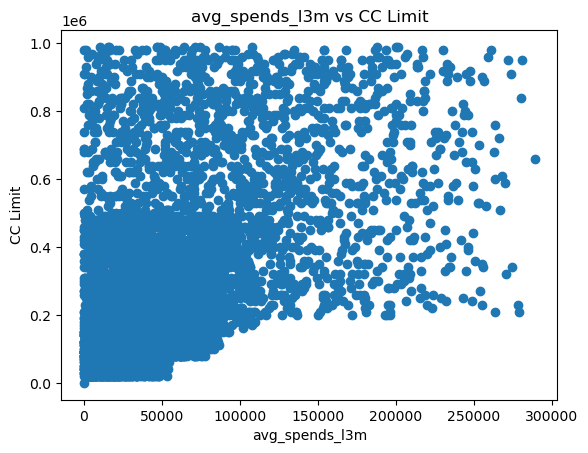

In [15]:
plt.xlabel('avg_spends_l3m')
plt.ylabel('CC Limit')
plt.title('avg_spends_l3m vs CC Limit')
plt.scatter(df['avg_spends_l3m'],df['cc_limit'])
#As the monthly cc limit is increasing avg monthy spends is also increasing

<Axes: title={'center': 'CC Limit Boxplot'}, xlabel='cc_limit'>

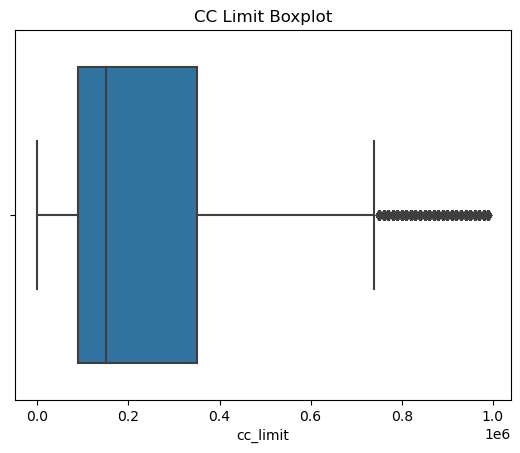

In [27]:

plt.xlabel('CC Limit')
plt.title('CC Limit Boxplot')
sns.boxplot(data=df, x='cc_limit')

<Axes: title={'center': 'Issuer vs CC Limit'}, xlabel='Issuer', ylabel='cc_limit'>

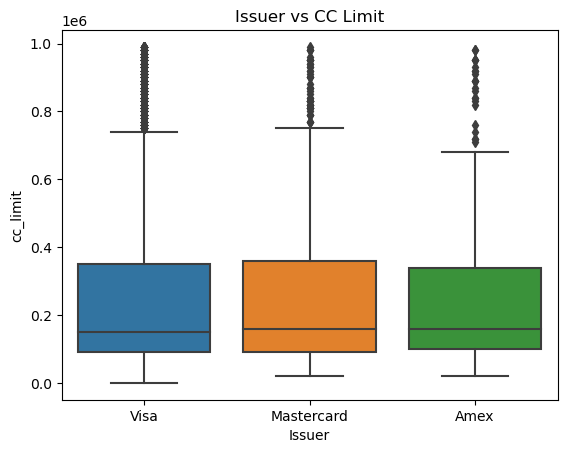

In [29]:
plt.xlabel('Issuer')
plt.ylabel('CC Limit')
plt.title('Issuer vs CC Limit')
sns.boxplot(data=df, x='Issuer', y='cc_limit')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


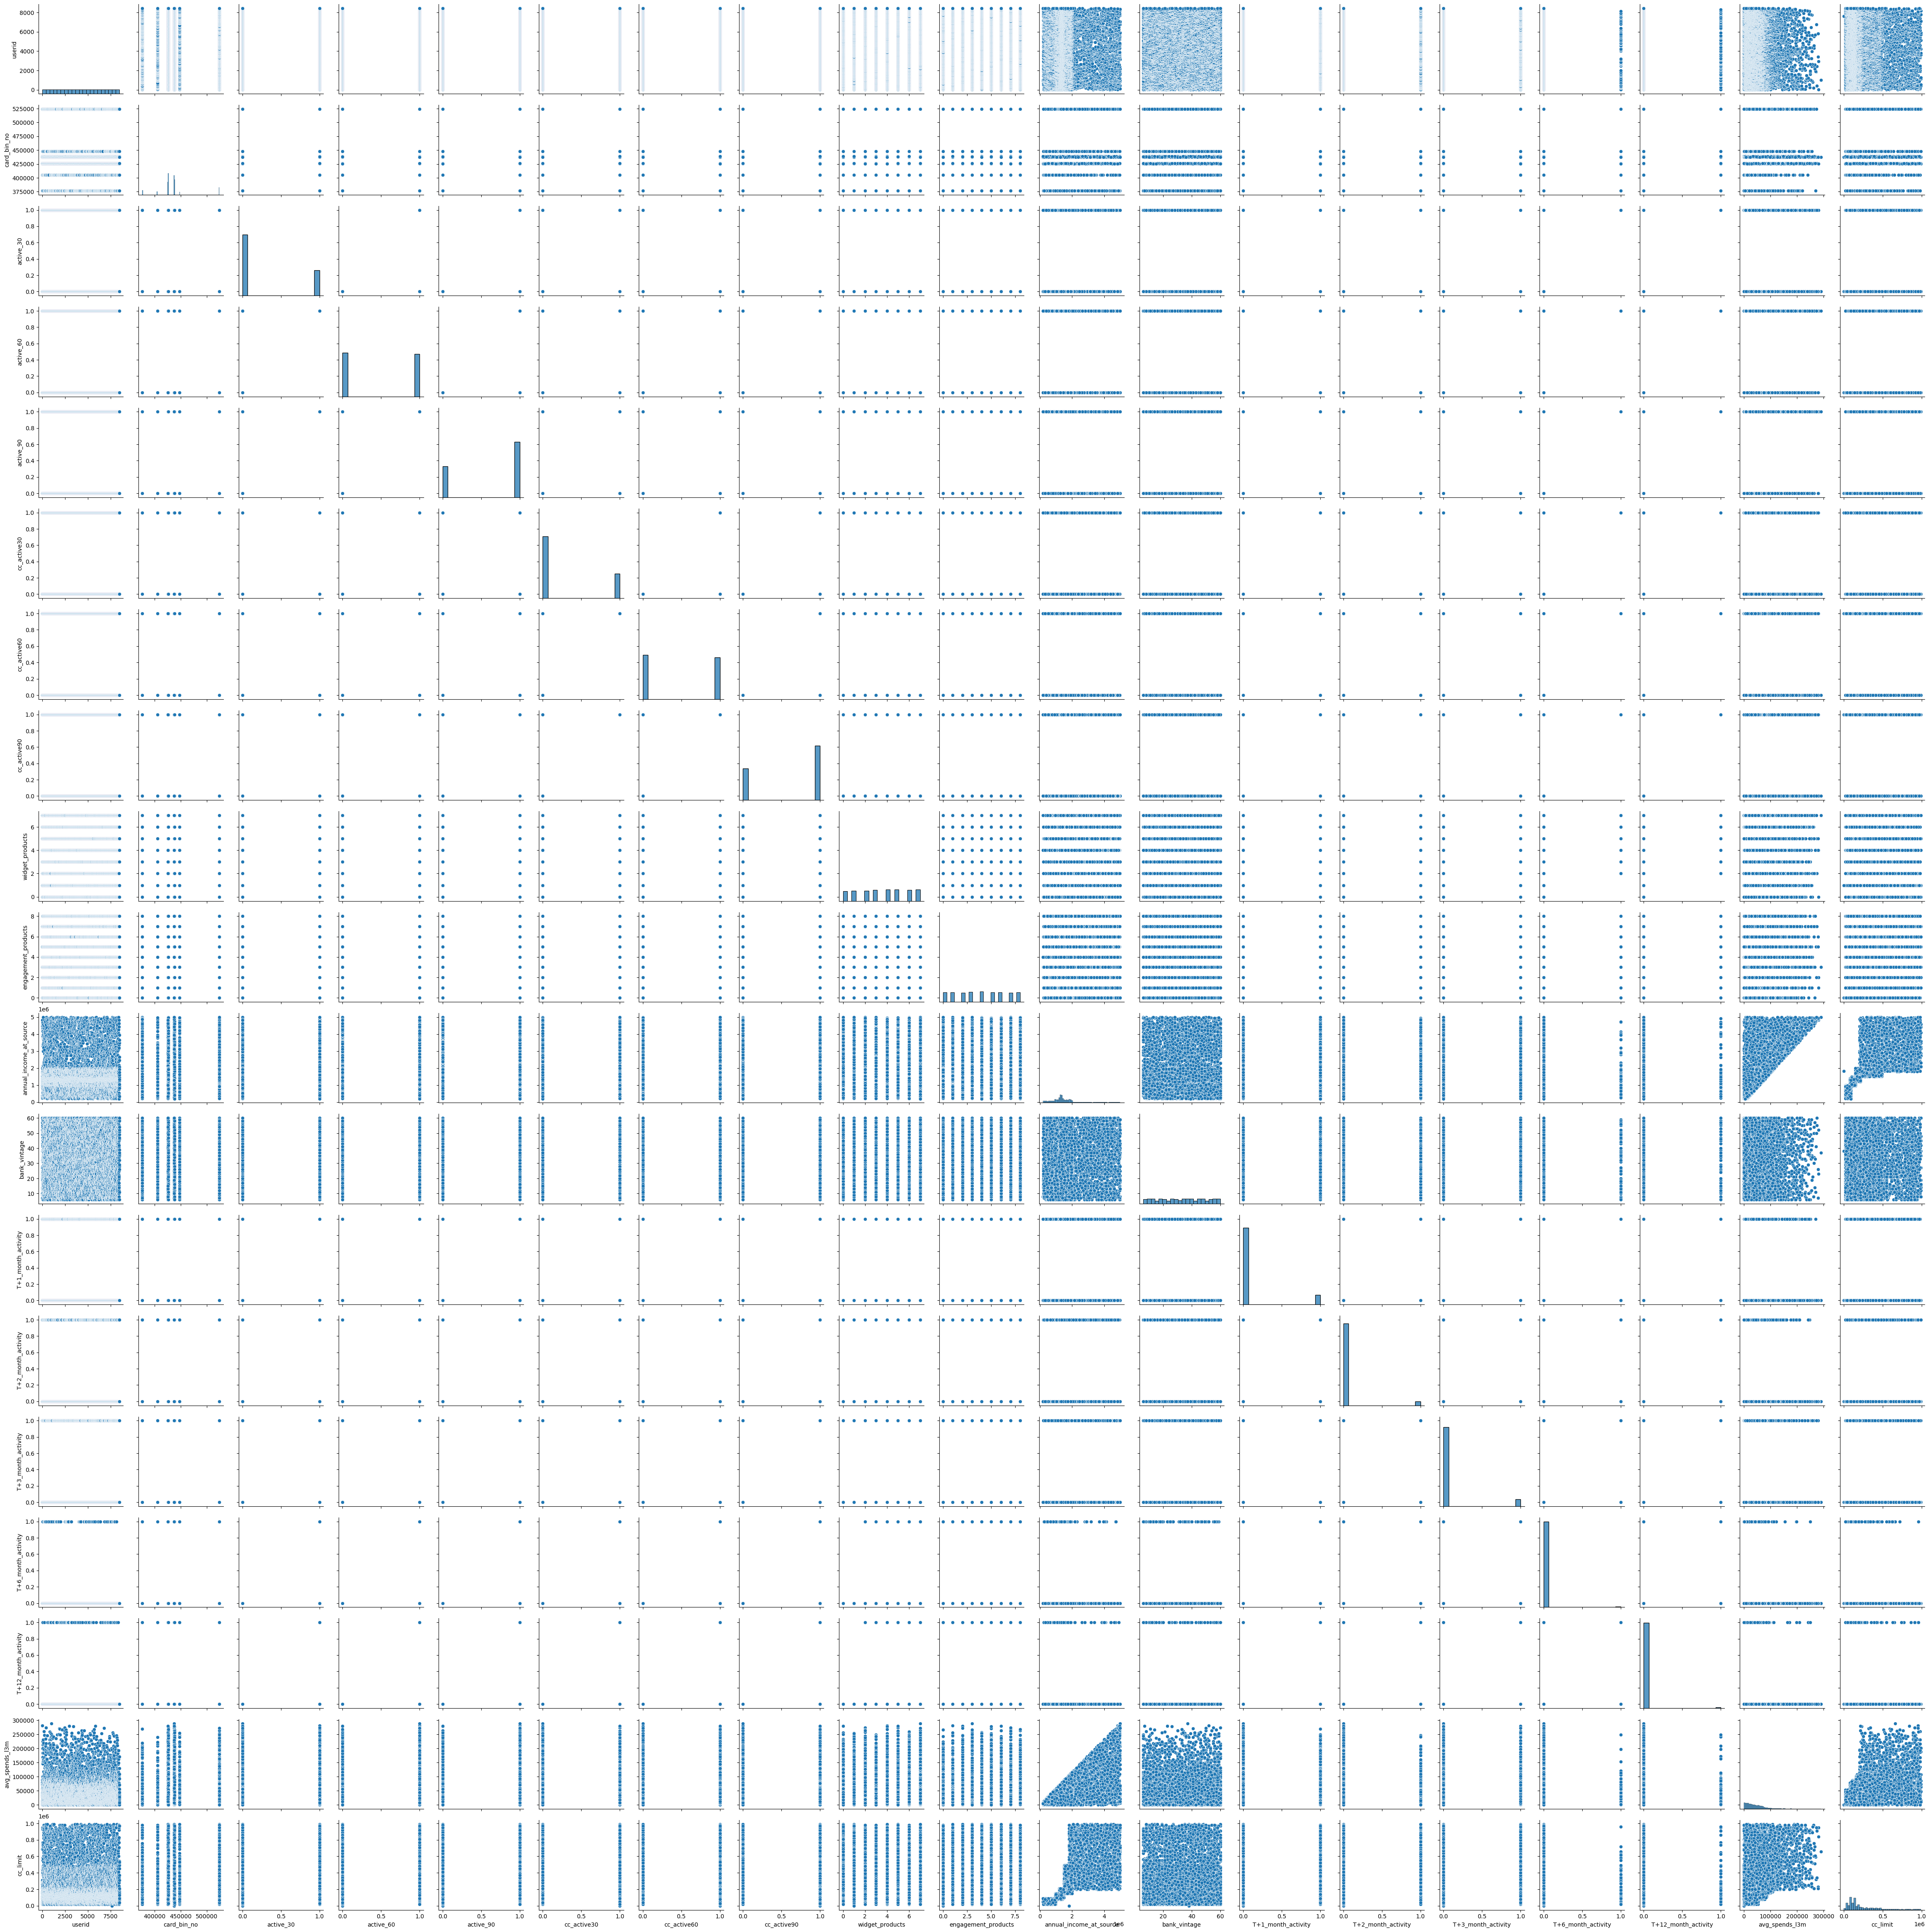

In [18]:
sns.pairplot(df)

<Axes: >

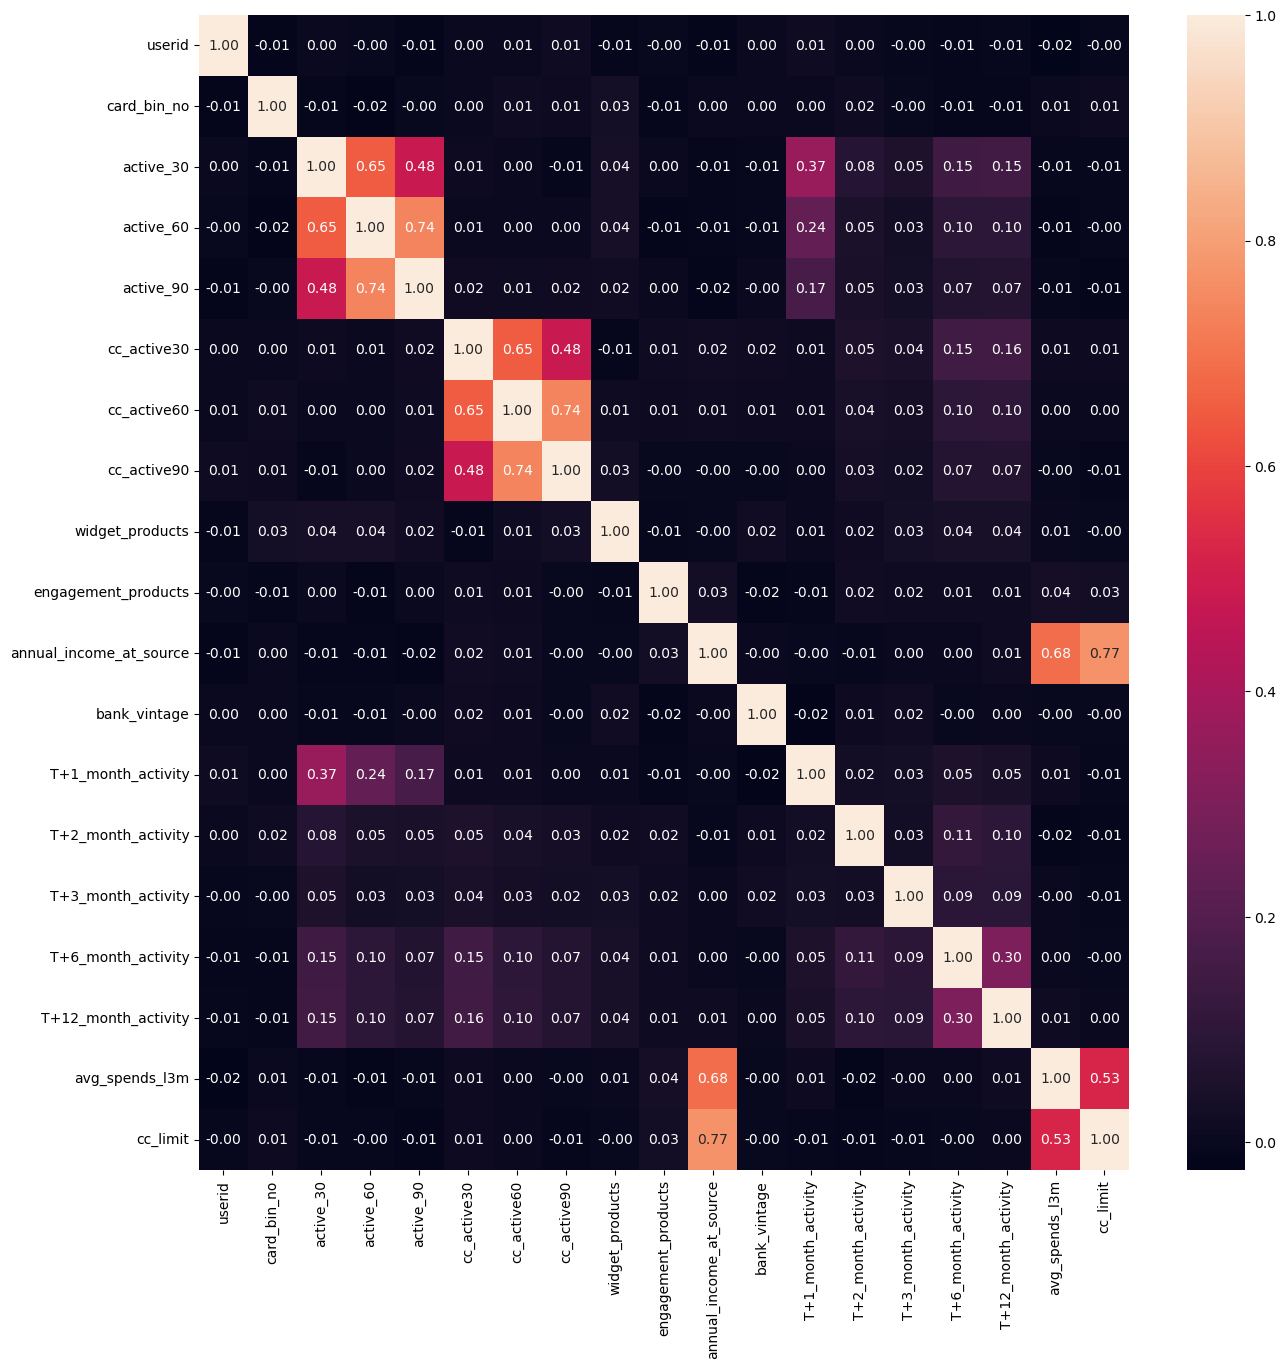

In [31]:

dfnum=df.select_dtypes(['int64','float64'])
plt.figure(figsize=(15,15))
sns.heatmap(dfnum.corr(), annot=True, fmt=".2f")

high correlation:

annual_income_at source     cc_limit

annual_income_at source     avg_spends_13

cc_limt                     avg_spends_13m

active 30                   active 60

active 30                   active 90

active 60                   active 90

active 30                   T+2_month_activity



In [20]:
pd.crosstab(df['Occupation_at_source'], df['Issuer'], margins= True, normalize= True)

Issuer                    Amex  Mastercard      Visa       All
Occupation_at_source                                          
0                     0.002012    0.003196  0.025687  0.030895
Housewife             0.002367    0.004143  0.038944  0.045455
Retired               0.004853    0.009233  0.114820  0.128906
Salaried              0.026160    0.038234  0.399384  0.463778
Self Employed         0.012784    0.024503  0.220170  0.257457
Student               0.004025    0.006866  0.062618  0.073509
All                   0.052202    0.086174  0.861624  1.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Issuer', ylabel='cc_limit'>

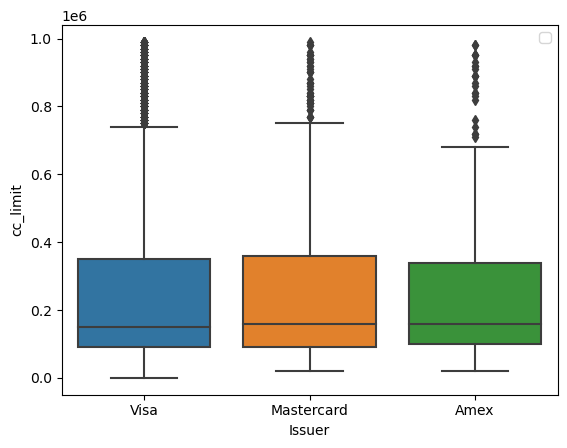

In [21]:
plt.legend(loc='upper right')

sns.boxplot(x='Issuer', y='cc_limit', data=df)


Text(0.5, 1.0, 'Annual Income at Source vs CC Limit')

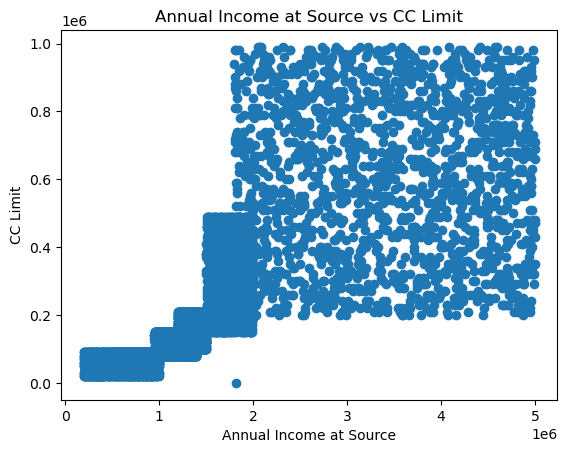

In [22]:
plt.scatter(df["annual_income_at_source"],df['cc_limit'])
plt.xlabel('Annual Income at Source')
plt.ylabel('CC Limit')
plt.title('Annual Income at Source vs CC Limit')

Text(0.5, 1.0, 'Annual Income at Source vs CC Limit')

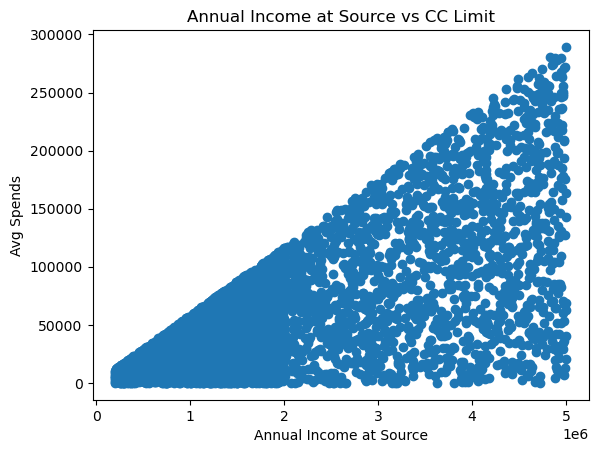

In [23]:
plt.scatter(df["annual_income_at_source"],df["avg_spends_l3m"])
plt.xlabel('Annual Income at Source')
plt.ylabel('Avg Spends')
plt.title('Annual Income at Source vs CC Limit')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, ' CC Limit vs High Netweworth')

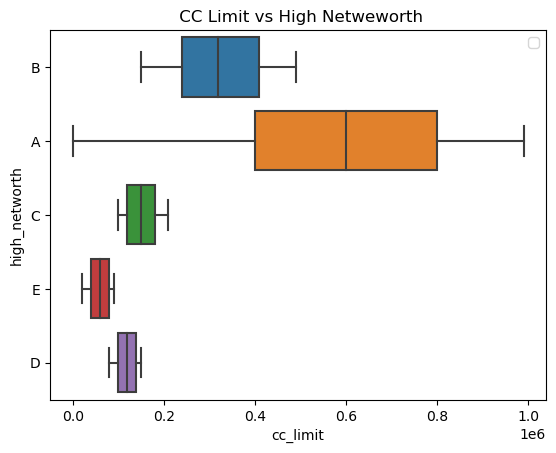

In [33]:
sns.boxplot(data=df, x="cc_limit", y='high_networth')
plt.legend(loc='upper right')

plt.title(' CC Limit vs High Netweworth')

<Axes: xlabel='card_source_date', ylabel='avg_spends_l3m'>

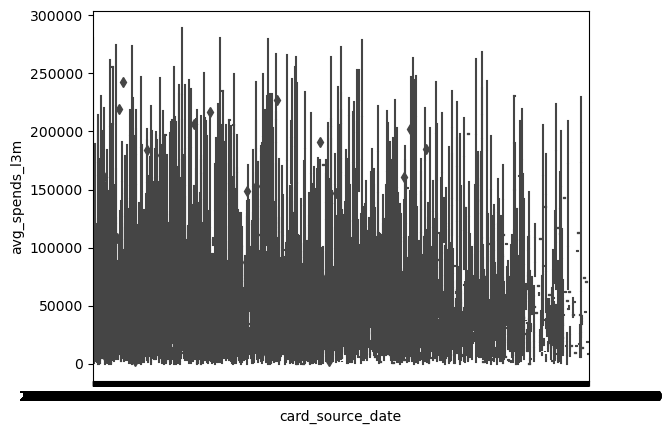

In [25]:
sns.boxplot(x='card_source_date', y='avg_spends_l3m', data=df)

Text(0.5, 1.0, 'CC Limit vs avg_spends_l3m')

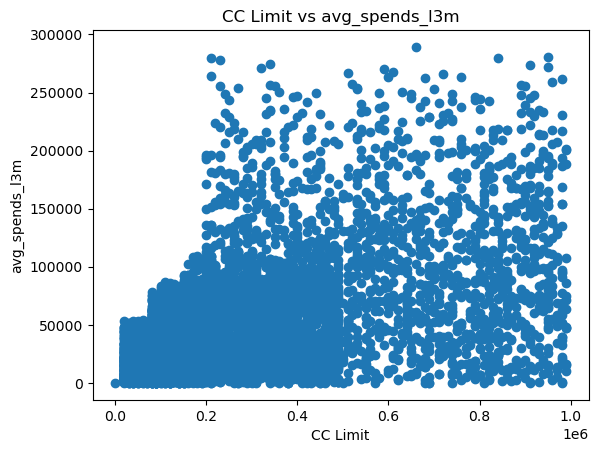

In [32]:
plt.scatter(df["cc_limit"],df["avg_spends_l3m"])
plt.xlabel('CC Limit')
plt.ylabel('avg_spends_l3m')
plt.title('CC Limit vs avg_spends_l3m')

Text(0.5, 1.0, 'CC Limit vs avg_spends_l3m')

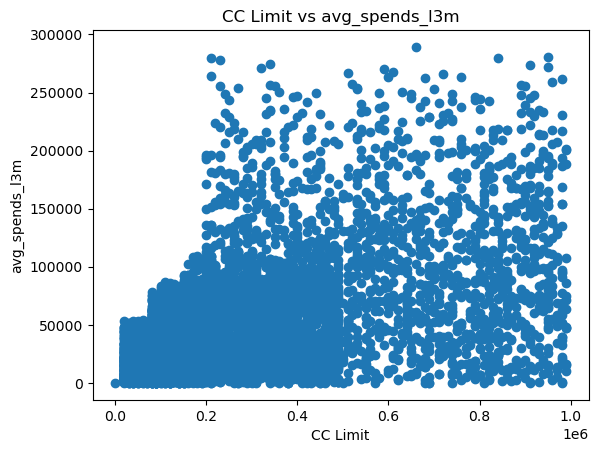

In [34]:
plt.scatter(df["cc_limit"],df["avg_spends_l3m"])
plt.xlabel('CC Limit')
plt.ylabel('avg_spends_l3m')
plt.title('CC Limit vs avg_spends_l3m')